<a href="https://colab.research.google.com/github/camondino/Meli-IAM-Challenge/blob/main/Challenge__v02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fase I. Business Understanding. Definición de necesidades del cliente (comprensión del negocio)

Objetivo: Crear un modelo de machine learning no supervisado que sea capaz de detectar anomalías; es decir, cuando el comportamiento del usuario sea atípico. 

**Requerimientos técnicos - obligatorios**

1.  Desarrollar los modelos de análisis y detección con el stack de Python, como Numpy, Pandas, Scikit-Learn y Matplotlib (sklearn) 
2.  Elaboración de una documentación con explicaciones de cada modelo, como fue construido, validado y sus resultados 
3. **Realizar gráficos que validen el correcto funcionamiento del modelo (matriz de confusión, curva de aprendizaje, etc) → No se puede hacer la matriz de confusión ni la curva de aprendizaje en los algoritmos no supervisados**
4.  Realizar una presentación aplicando técnicas de Data Storytelling en la que se detallen los descubrimientos y patrones hallados en ambos datasets y pruebas y validaciones sobre los modelos.


**Requerimientos técnicos - opcionales**


1.   Utilizar múltiples modelos de aprendizaje y sacar conclusiones
2.   Utilizar algún framework de minería de datos como CRISP o KDD
3.   Poder consultar el modelo mediante API Rest. Si es posible, también deployar la API del modelo en la nube
4.   Utilizar herramientas cloud (GCP, AWS) para generar el modelo


# Fase II. Data Understanding. Estudio y comprensión de los datos

## Instalamos Librerias


In [1]:
!pip3 install matplotlib -q

In [2]:
!pip install ydata-profiling -q

In [3]:
# Procesamiento
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OrdinalEncoder

# Modelos
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import plotly.express as px
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d
from sklearn.metrics import silhouette_score

## EDA

Abrimos el archivo csv con Pandas y analizamos un poco las columnas para ver el tipo de cada atributo y si tienen valores nan

In [4]:
path = '/content/datasetChallangeMeLi.csv'
df = pd.read_csv(path, engine='python', encoding_errors='replace', on_bad_lines='warn') # Si queremos leer menos lineas usamos: nrows=300000 
df.head()

timestamp  processId  parentProcessId  userId      processName  \
0  124.440464        387                1     101  systemd-resolve   
1  124.441004          1                0       0          systemd   
2  124.441045          1                0       0          systemd   
3  124.441073          1                0       0          systemd   
4  124.441202          1                0       0          systemd   

         hostName  eventId           eventName  argsNum  returnValue  \
0  ip-10-100-1-26       41              socket        3           15   
1  ip-10-100-1-26     1005  security_file_open        4            0   
2  ip-10-100-1-26      257              openat        4           12   
3  ip-10-100-1-26        5               fstat        2            0   
4  ip-10-100-1-26        3               close        1            0   

                                                args  sus  evil  
0  [{'name': 'domain', 'type': 'int', 'value': 'A...    0     0  
1  [{'name': 'pathname', 'type': 'const char*', '...    0     0  
2  [{'name': 'dirfd', 'type': 'int', 'value': -10...    0     0  
3  [{'name': 'fd', 'type': 'int', 'value': 12}, {...    0     0  
4       [{'name': 'fd', 'type': 'int', 'value': 12}]    0     0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378424 entries, 0 to 378423
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   timestamp        378424 non-null  float64
 1   processId        378424 non-null  int64  
 2   parentProcessId  378424 non-null  int64  
 3   userId           378424 non-null  int64  
 4   processName      378424 non-null  object 
 5   hostName         378424 non-null  object 
 6   eventId          378424 non-null  int64  
 7   eventName        378424 non-null  object 
 8   argsNum          378424 non-null  int64  
 9   returnValue      378424 non-null  int64  
 10  args             378424 non-null  object 
 11  sus              378424 non-null  int64  
 12  evil             378424 non-null  int64  
dtypes: float64(1), int64(8), object(4)
memory usage: 37.5+ MB


In [6]:
df.describe()

timestamp      processId  parentProcessId         userId  \
count  378424.000000  378424.000000    378424.000000  378424.000000   
mean     9413.519954    7125.987120      2727.309684       2.430403   
std      5532.956673    1702.937597      2461.879604      39.861484   
min       124.440464       1.000000         0.000000       0.000000   
25%      4591.266189    7412.000000      1567.000000       0.000000   
50%      9396.526013    7543.000000      1570.000000       0.000000   
75%     14235.894591    7662.000000      1570.000000       0.000000   
max     18887.205309    7792.000000      7788.000000    1000.000000   

             eventId        argsNum    returnValue            sus      evil  
count  378424.000000  378424.000000  378424.000000  378424.000000  378424.0  
mean      362.033753       2.850387      14.116832       0.008094       0.0  
std       418.212996       1.360875     274.614445       0.089602       0.0  
min         3.000000       0.000000    -115.000000       0.000000       0.0  
25%         3.000000       1.000000       0.000000       0.000000       0.0  
50%       257.000000       4.000000       0.000000       0.000000       0.0  
75%      1005.000000       4.000000       6.000000       0.000000       0.0  
max      1010.000000       5.000000    7791.000000       1.000000       0.0

Vamos a realizar el EDA de todo el dataset

In [7]:
profile = ProfileReport(df, title="EDA")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Viendo el resultado del EDA, podemos sacar multiples conclusiones de las variables. Algunos atributos: 
* aportan la misma información como processId con processName y eventId con eventName
* No aportan información ya que son siempre constantes como hostName, sus y evil
* El 98.9% de los registros de userId son 0
* 100% de evil son 0
* La relación entre processId y processName no es 1:1
* La gran mayoria de las variables son categoricas


Verificamos que la relacion entre processId y processName no es 1:1


In [8]:
l = np.unique(df['processId'])

# Por id
for id in l[0:10]:

  # Contamos numero de procesos unicos (cada id deberia tener un unico processName)
  df_filter = df[df['processId'] == id]
  num = df_filter['processName'].nunique()
  print(id, num)

1 1
5 1
7 1
8 1
78 1
93 1
159 2
310 1
383 2
387 1


In [9]:
df[df['processId']==159]

timestamp  processId  parentProcessId  userId      processName  \
573       132.892554        159                1       0  systemd-journal   
577       132.892843        159                1       0  systemd-journal   
579       132.892935        159                1       0  systemd-journal   
580       132.893515        159                1       0  systemd-journal   
582       132.893677        159                1       0  systemd-journal   
...              ...        ...              ...     ...              ...   
295760  14810.099835        159                1       0  systemd-journal   
295761  14810.099888        159                1       0  systemd-journal   
295762  14810.099923        159                1       0  systemd-journal   
295763  14810.100007        159                1       0  systemd-journal   
295764  14810.110754        159                1       0  systemd-journal   

              hostName  eventId           eventName  argsNum  returnValue  \
573     ip-10-100-1-26     1005  security_file_open        4            0   
577     ip-10-100-1-26      257              openat        4           39   
579     ip-10-100-1-26        5               fstat        2            0   
580     ip-10-100-1-26        3               close        1            0   
582     ip-10-100-1-26     1003         cap_capable        1            0   
...                ...      ...                 ...      ...          ...   
295760  ip-10-100-1-26      217          getdents64        3          128   
295761  ip-10-100-1-26      217          getdents64        3            0   
295762  ip-10-100-1-26        3               close        1            0   
295763  ip-10-100-1-26      257              openat        4           -2   
295764  ip-10-100-1-26        5               fstat        2            0   

                                                     args  sus  evil  
573     [{'name': 'pathname', 'type': 'const char*', '...    0     0  
577     [{'name': 'dirfd', 'type': 'int', 'value': -10...    0     0  
579     [{'name': 'fd', 'type': 'int', 'value': 39}, {...    0     0  
580          [{'name': 'fd', 'type': 'int', 'value': 39}]    0     0  
582     [{'name': 'cap', 'type': 'int', 'value': 'CAP_...    0     0  
...                                                   ...  ...   ...  
295760  [{'name': 'fd', 'type': 'int', 'value': 34}, {...    0     0  
295761  [{'name': 'fd', 'type': 'int', 'value': 34}, {...    0     0  
295762       [{'name': 'fd', 'type': 'int', 'value': 34}]    0     0  
295763  [{'name': 'dirfd', 'type': 'int', 'value': -10...    0     0  
295764  [{'name': 'fd', 'type': 'int', 'value': 22}, {...    0     0  

[3396 rows x 13 columns]

# Fase III. Data Preparation. Análisis de los datos y selección de características

**Procesamiento de los datos:** Luego de analizar los resultados, realizamos el procesamiento basico de los atributos (feature selection & engineering). El procesamiento continua una vez que definimos el modelo de Machine Learning a entrenar ya que cada algoritmo requiere cierto tipo de atributos.

In [7]:
# Eliminamos columnas que no aportan valor
df_filtered = df.drop(['hostName', 'evil', 'sus', 'args'], axis=1) 

# Nos quedamos con los registros que tienen valor distinto de 0 en userid
df_filtered = df_filtered[df_filtered['userId']!=0] 
df_filtered.head()

timestamp  processId  parentProcessId  userId      processName  eventId  \
0  124.440464        387                1     101  systemd-resolve       41   
5  124.441520        387                1     101  systemd-resolve        3   
6  124.441626        387                1     101  systemd-resolve     1005   
7  124.441696        387                1     101  systemd-resolve      257   
8  124.441733        387                1     101  systemd-resolve        5   

            eventName  argsNum  returnValue  
0              socket        3           15  
5               close        1            0  
6  security_file_open        4            0  
7              openat        4           15  
8               fstat        2            0

In [8]:
# Volvemos a hacer EDA 
profile = ProfileReport(df_filtered, title="Profiling Report after EDA")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Convertimos atributos de tipo string en int

encoder = OrdinalEncoder()
df_filtered['processName_categ'] = encoder.fit_transform(df_filtered[['processName']])
df_filtered.drop(['processName', 'eventName'], axis = 1, inplace=True)
df_filtered

timestamp  processId  parentProcessId  userId  eventId  argsNum  \
0         124.440464        387                1     101       41        3   
5         124.441520        387                1     101        3        1   
6         124.441626        387                1     101     1005        4   
7         124.441696        387                1     101      257        4   
8         124.441733        387                1     101        5        2   
...              ...        ...              ...     ...      ...      ...   
377532  18831.097571       7790             7788     109      157        5   
378273  18838.705986       7790             7788     109     1010        0   
378329  18839.178887       7789             7787     109     1010        0   
378396  18875.416442        383                1     100       41        3   
378401  18875.417240        383                1     100        3        1   

        returnValue  processName_categ  
0                15                9.0  
5                 0                9.0  
6                 0                9.0  
7                15                9.0  
8                 0                9.0  
...             ...                ...  
377532            0                6.0  
378273            0                6.0  
378329            0                6.0  
378396           15                8.0  
378401            0                8.0  

[4051 rows x 8 columns]

# Fase IV & V. Modeling. Modelado - Evaluation. Evaluación (obtención de resultados)



## Usuario por usuario

Para poder usar kmeans, necesitamos que las columnas sean de tipo entero. Kmeans no funciona con variables categoricas ya que necesitamos calcular distancias (como la eculidea) y eso no se puede hacer con categoricas. Si tenemos columnas categoricas, se puede entrenar un modelo por cada categoria

### Procesamiento para los modelos

In [ ]:
df_filtered.head()

timestamp  processId  parentProcessId  userId  eventId  argsNum  \
0  124.440464        387                1     101       41        3   
5  124.441520        387                1     101        3        1   
6  124.441626        387                1     101     1005        4   
7  124.441696        387                1     101      257        4   
8  124.441733        387                1     101        5        2   

   returnValue  processName_categ  
0           15                9.0  
5            0                9.0  
6            0                9.0  
7           15                9.0  
8            0                9.0

Nos quedamos solo con las columnas con numeros continuos para poder entrenar el algoritmo k-means

In [ ]:
### ELEGIMOS USUARIO
user = 101

### ELEGIMOS VARIABLES
var1 = 'eventId'
var2 = 'processName_categ'
var3 = 'parentProcessId'

In [ ]:
# Nos quedamos solo con las posibles variables para entrenar un modelo de kmeans

columns = ['processId','parentProcessId', 'eventId', 'argsNum', 'returnValue','userId','processName_categ']
df_kmeans = df_filtered[columns]

# Filtramos dataframe y nos quedamos con un usuario solo

df_kmeans101 = df_kmeans[df_kmeans['userId']==user]
df_kmeans101.drop(['userId'],axis=1, inplace=True)
df_kmeans101

<ipython-input-223-39df57dfe451>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



processId  parentProcessId  eventId  argsNum  returnValue  \
0            387                1       41        3           15   
5            387                1        3        1            0   
6            387                1     1005        4            0   
7            387                1      257        4           15   
8            387                1        5        2            0   
...          ...              ...      ...      ...          ...   
78912        387                1        3        1            0   
80136        387                1       41        3           15   
80145        387                1        3        1            0   
82436        387                1       41        3           15   
82445        387                1        3        1            0   

       processName_categ  
0                    9.0  
5                    9.0  
6                    9.0  
7                    9.0  
8                    9.0  
...                  ...  
78912                9.0  
80136                9.0  
80145                9.0  
82436                9.0  
82445                9.0  

[589 rows x 6 columns]

In [ ]:
# Asi queda el dataframe final que usaremos para entrenar el modelo

columns = [var1, var2, var3] 
df_kmeans101 = df_kmeans101[columns]
df_kmeans101

eventId  processName_categ  parentProcessId
0           41                9.0                1
5            3                9.0                1
6         1005                9.0                1
7          257                9.0                1
8            5                9.0                1
...        ...                ...              ...
78912        3                9.0                1
80136       41                9.0                1
80145        3                9.0                1
82436       41                9.0                1
82445        3                9.0                1

[589 rows x 3 columns]

In [ ]:
# Dividimos el dataset en train y test 

df_train, df_test = train_test_split(df_kmeans101, test_size=0.2, random_state=42)

In [ ]:
# Normalizamos los datos para poder calcular las distancias
scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_train)
df_encoded_scaled = pd.DataFrame(df_encoded_scaled, columns=df_train.columns)
df_encoded_scaled

eventId  processName_categ  parentProcessId
0   -0.531355                0.0              0.0
1    0.194534                0.0              0.0
2   -0.425197                0.0              0.0
3    2.340641                0.0              0.0
4   -0.528486                0.0              0.0
..        ...                ...              ...
466 -0.531355                0.0              0.0
467 -0.534224                0.0              0.0
468 -0.528486                0.0              0.0
469 -0.528486                0.0              0.0
470 -0.531355                0.0              0.0

[471 rows x 3 columns]

In [ ]:
# Gráfico con 2 variables
fig = px.scatter(df_train, x=var1, y=var2) # x=df_train.index,
fig.show()

In [ ]:
# Grafico con 3 variables
fig = px.scatter_3d(df_train, x=var1, y=var2, z=var3)
fig.update_layout(title='Gráfico en 3D')
fig.show()

### K means

Una vez que ya elegimos las variables, buscamos el valor del K (cantidad de grupos) optimo. Vamos a probar de dos maneras distintas. 

1.  Agrupacion Jerarquica
2.  Metodo del codo



Forma 1) Agrupacion Jerarquica: entrenamos este modelo no supervisado y graficamos el dendograma

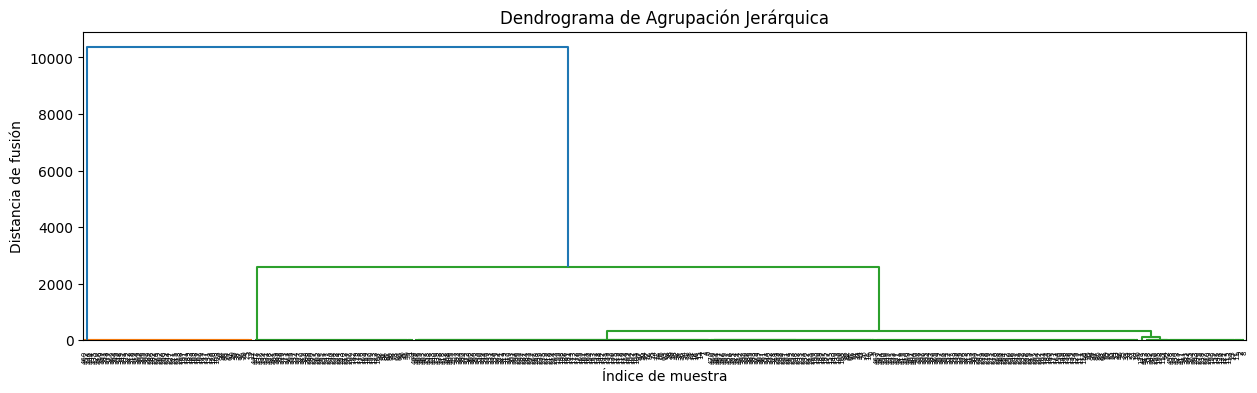

In [ ]:
# Calcular la matriz de enlaces
X = df_train.values
Z = linkage(X, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(15, 4))
dendrogram(Z)
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia de fusión')
plt.title('Dendrograma de Agrupación Jerárquica')
plt.show()

Forma 2) Metodo del codo: calculamos la inercia para cada K y graficamos el resultado para buscar el codo

<ipython-input-230-ca4b3d496066>:9: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.

<ipython-input-230-ca4b3d496066>:9: ConvergenceWarning:

Number of distinct clusters (8) found smaller than n_clusters (10). Possibly due to duplicate points in X.



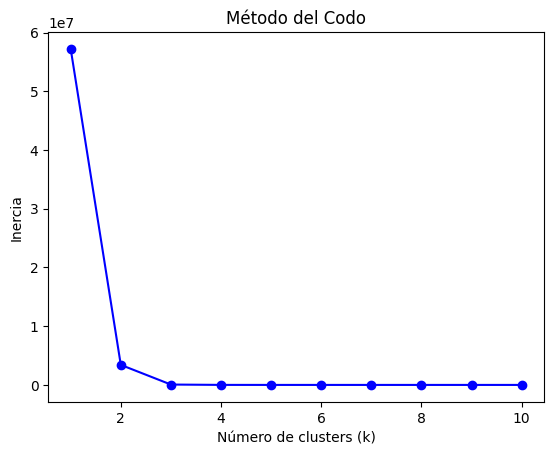

In [ ]:
# Lista para almacenar los valores de inercia (suma de distancias cuadradas)
inercias = []

# Rango de valores de k para probar
k_values = range(1, 11)  

# Iterar sobre los valores de k y calcular la inercia para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df_train)
    inercias.append(kmeans.inertia_)

# Graficar la curva de inercias en función de k
plt.plot(k_values, inercias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

En el grafico podemos ver que un numero optimo de K es 2 o 3

In [ ]:
df_train.head()

eventId  processName_categ  parentProcessId
33665        4                9.0                1
39607      257                9.0                1
6704        41                9.0                1
74102     1005                9.0                1
39732        5                9.0                1

Vamos a entrenar un algortimo de kmeans con k=2

Puntuación del coeficiente de silueta: 0.9268231733821702


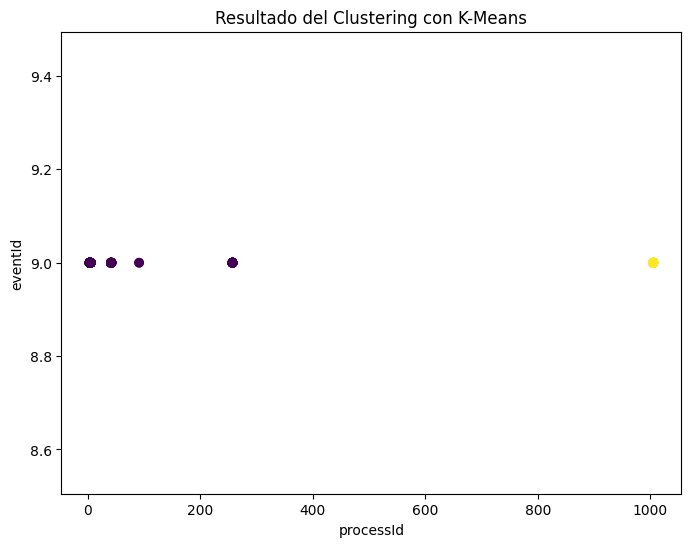

In [ ]:
df_kmeans = df_train.copy()
k = 2  # Número de clusters

kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

# Entrenar el modelo de KMeans
kmeans.fit(df_kmeans)

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_

# Calcular la puntuación del coeficiente de silueta
silhouette_avg = silhouette_score(X, labels)

# Imprimir la puntuación del coeficiente de silueta
print(f'Puntuación del coeficiente de silueta: {silhouette_avg}')

# Agregar las etiquetas de cluster como una columna al DataFrame original
df_kmeans['cluster'] = labels

# Graficar los resultados en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df_kmeans[var1], df_kmeans[var2], c=labels, cmap='viridis')
ax.set_title('Resultado del Clustering con K-Means')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
# plt.colorbar(scatter)
plt.show()

In [ ]:
# Graficar el resultado en 3D
fig = px.scatter_3d(df_kmeans, x=var1, y=var2, z=var3, color='cluster',
                    color_continuous_scale='Viridis', opacity=0.8, size_max=5)
fig.update_layout(scene=dict(xaxis_title=var1, yaxis_title=var2, zaxis_title=var3))
fig.show()

In [ ]:
df_kmeans.head()

eventId  processName_categ  parentProcessId  cluster
33665        4                9.0                1        0
39607      257                9.0                1        0
6704        41                9.0                1        0
74102     1005                9.0                1        1
39732        5                9.0                1        0

Como parte del procesamiento de los datos, habiamos normalizados los datos. Ahora necesitamos invertir la operacion para que los valores de los atributos tengan sentido.


In [ ]:
# Desnormalizamos los datos
columnas_desnormalizar = [var1, var2, var3]
df_kmeans[columnas_desnormalizar] = scaler.inverse_transform(df_kmeans[columnas_desnormalizar])
df_kmeans.head()

eventId  processName_categ  parentProcessId  cluster
33665    1583.349566               18.0              2.0        0
39607   89763.470733               18.0              2.0        0
6704    14479.256614               18.0              2.0        0
74102  350469.915922               18.0              2.0        1
39732    1931.887594               18.0              2.0        0

Podemos ver que el evento anomalo es el que se encuentra en el cluster=1

In [ ]:
df_kmeans[df_kmeans['cluster']==1].head()

eventId  processName_categ  parentProcessId  cluster
74102  350469.915922               18.0              2.0        1
39769  350469.915922               18.0              2.0        1
39773  350469.915922               18.0              2.0        1
39724  350469.915922               18.0              2.0        1
26     350469.915922               18.0              2.0        1

Predecimos el cluster de los registros en el conjunto de testeo

In [ ]:
# Realizamos las predicciones

df_kmeans_test = df_test.copy()
predicciones = kmeans.predict(df_kmeans_test)
df_kmeans_test['prediction'] = predicciones
df_kmeans_test

eventId  processName_categ  parentProcessId  prediction
74192        5                9.0                1           0
39766        5                9.0                1           0
74184     1005                9.0                1           1
45703       41                9.0                1           0
39685        5                9.0                1           0
...        ...                ...              ...         ...
74225      257                9.0                1           0
24198       41                9.0                1           0
48249        3                9.0                1           0
45757        4                9.0                1           0
45705        4                9.0                1           0

[118 rows x 4 columns]

Podemos ver que las categorias con prediccion=1 son los eventos anomalos para este usuario

### Isolation Forest

Entrenamos el modelo con el mismo dataset que usamos en kmeans ya que para este modelo, tambien se requiere que las variables sean numericas

In [ ]:
modelo = IsolationForest(n_estimators=100, contamination=0.05)

df_isolation = df_train.copy()
# Ajustar el modelo a los datos
modelo.fit(df_isolation)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05)

In [ ]:
# Predecir las anomalías en los datos
predicciones = modelo.predict(df_isolation)

# Las predicciones son -1 para anomalías y 1 para datos normales
cantidad_anomalias = (predicciones == -1).sum()
print('Cantidad de anomalias: ', cantidad_anomalias)

# También podemos obtener la puntuación de anomalía para cada punto de datos
puntuaciones_anomalia = modelo.decision_function(df_isolation)
df_isolation['puntuaciones_anomalia'] = puntuaciones_anomalia
df_isolation['cluster'] = predicciones

df_isolation.head()

Cantidad de anomalias:  12


eventId  processName_categ  parentProcessId  puntuaciones_anomalia  \
33665        4                9.0                1               0.126729   
39607      257                9.0                1               0.039140   
6704        41                9.0                1               0.061287   
74102     1005                9.0                1               0.000000   
39732        5                9.0                1               0.145957   

       cluster  
33665        1  
39607        1  
6704         1  
74102        1  
39732        1

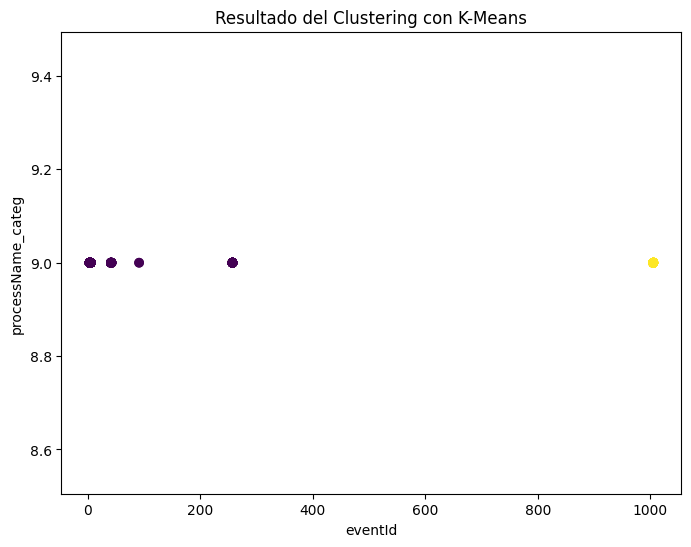

In [ ]:
# Graficamos los resultados en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df_isolation[var1], df_isolation[var2], c=labels, cmap='viridis')
ax.set_title('Resultado del Clustering con K-Means')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
# plt.colorbar(scatter)
plt.show()

In [ ]:
# Graficamos el resultado en 3D
fig = px.scatter_3d(df_isolation, x=var1, y=var2, z=var3, color='cluster',
                    color_continuous_scale='Viridis', opacity=0.8, size_max=5)
fig.update_layout(scene=dict(xaxis_title=var1, yaxis_title=var2, zaxis_title=var3))
fig.show()

Vamos ahora a predecir la clase con el conjunto de testeo

In [ ]:
df_isolation_test = df_test.copy()
# Aplicar el modelo entrenado para predecir anomalías en los nuevos datos
predicciones_nuevos_datos = modelo.predict(df_isolation_test)
df_isolation_test['predicciones'] = predicciones_nuevos_datos
df_isolation_test

eventId  processName_categ  parentProcessId  predicciones
74192        5                9.0                1             1
39766        5                9.0                1             1
74184     1005                9.0                1             1
45703       41                9.0                1             1
39685        5                9.0                1             1
...        ...                ...              ...           ...
74225      257                9.0                1             1
24198       41                9.0                1             1
48249        3                9.0                1             1
45757        4                9.0                1             1
45705        4                9.0                1             1

[118 rows x 4 columns]

Podemos ver que los registros cuyas clases son -1, son los eventos considerados anomalos

In [ ]:
df_isolation_test[df_isolation_test['predicciones']==-1]

eventId  processName_categ  parentProcessId  predicciones
74252       91                9.0                1            -1
74249       91                9.0                1            -1
6705        42                9.0                1            -1

Por lo tanto, para el usuario en cuestion, los eventos anomalos serian cuando el eventId es 91, el processName_categ = 9 y el parentProcessId = 1 y tambien cuando el eventId es 42, el processName_categ = 9 y el parentProcessId = 1

### Con estadistica 

Vamos a tomar un ultimo approach al problema, esta vez con estadistica.

Consideremos el siguiente ejemplo de una anomalia: *Si el usuario de id 1000 solo genera eventos con proceso de tipo “ps” y de repente genera eventos con procesos “bash” debería ser considerado como anómalo. En cambio si el usuario 100 solo genera eventos con procesos bash no debe ser considerado como anómalo.*

Entonces, podemos ver la frecuencia de los procesos generados por cada usuario y etiquetar como anomalos los que tengan frecuencia muy baja. Para eso, graficamos un histograma para eventos y otro para procesosa

In [ ]:
# Creamos un histograma de eventId

df_kmeans101[var1].unique()

fig = px.histogram(df_kmeans101, x=var1, nbins=len(df_kmeans101))
fig.show()

Vemos que hay algunos eventos que tienen alta frecuencia como el eventId=5 o eventId=1005. Sin embargo, hay otro como eventId=91 o eventId=42 que tiene muy baja frecuencia por lo que seria considerado anomalo. Como podemos ver, concuerda con lo obtenido en el modelo anterior en el que obtuvimos que los eventos anomalos serian cuando el eventId es 91, el processName_categ = 9 y el parentProcessId = 1 y tambien cuando el eventId es 42, el processName_categ = 9 y el parentProcessId = 1


In [ ]:
# Creamos un histograma de processId

print(df_kmeans101[var2].unique())
fig = px.histogram(df_kmeans101, x=var3, nbins=len(df_kmeans101))
fig.show()

[9.]


Vemos que hay un solo procesId por lo que no vemos nada anomalo

## Usuario por usuario

Para poder usar kmeans, necesitamos que las columnas sean de tipo entero. Kmeans no funciona con variables categoricas ya que necesitamos calcular distancias (como la eculidea) y eso no se puede hacer con categoricas. Si tenemos columnas categoricas, se puede entrenar un modelo por cada categoria

### Procesamiento para los modelos

In [10]:
df_filtered.head()

timestamp  processId  parentProcessId  userId  eventId  argsNum  \
0  124.440464        387                1     101       41        3   
5  124.441520        387                1     101        3        1   
6  124.441626        387                1     101     1005        4   
7  124.441696        387                1     101      257        4   
8  124.441733        387                1     101        5        2   

   returnValue  processName_categ  
0           15                9.0  
5            0                9.0  
6            0                9.0  
7           15                9.0  
8            0                9.0

Nos quedamos solo con las columnas con numeros continuos para poder entrenar el algoritmo k-means

In [11]:
### ELEGIMOS USUARIO
user = 1000

### ELEGIMOS VARIABLES
var1 = 'eventId'
var2 = 'processName_categ'
var3 = 'parentProcessId'

In [12]:
# Nos quedamos solo con las posibles variables para entrenar un modelo de kmeans

columns = ['processId','parentProcessId', 'eventId', 'argsNum', 'returnValue','userId','processName_categ']
df_kmeans = df_filtered[columns]

# Filtramos dataframe y nos quedamos con un usuario solo

df_kmeans101 = df_kmeans[df_kmeans['userId']==user]
df_kmeans101.drop(['userId'],axis=1, inplace=True)
df_kmeans101

<ipython-input-12-39df57dfe451>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans101.drop(['userId'],axis=1, inplace=True)


processId  parentProcessId  eventId  argsNum  returnValue  \
61         7238             1075        3        1            0   
62         7238             1075        3        1            0   
63         1047              940        3        1            0   
64         1075             1047     1010        0            0   
65         7238             1075     1010        0            0   
...         ...              ...      ...      ...          ...   
1466        725                1        3        1            0   
1467        725                1        3        1            0   
1468        725                1        3        1            0   
1470        725                1     1010        0            0   
1565        726                1     1010        0            0   

      processName_categ  
61                  5.0  
62                  5.0  
63                  6.0  
64                 10.0  
65                  5.0  
...                 ...  
1466                7.0  
1467                7.0  
1468                7.0  
1470                7.0  
1565                0.0  

[568 rows x 6 columns]

In [13]:
# Asi queda el dataframe final que usaremos para entrenar el modelo

columns = [var1, var2, var3] 
df_kmeans101 = df_kmeans101[columns]
df_kmeans101

eventId  processName_categ  parentProcessId
61          3                5.0             1075
62          3                5.0             1075
63          3                6.0              940
64       1010               10.0             1047
65       1010                5.0             1075
...       ...                ...              ...
1466        3                7.0                1
1467        3                7.0                1
1468        3                7.0                1
1470     1010                7.0                1
1565     1010                0.0                1

[568 rows x 3 columns]

In [14]:
# Dividimos el dataset en train y test 

df_train, df_test = train_test_split(df_kmeans101, test_size=0.2, random_state=42)

In [15]:
# Normalizamos los datos para poder calcular las distancias
scaler = StandardScaler()
df_encoded_scaled = scaler.fit_transform(df_train)
df_encoded_scaled = pd.DataFrame(df_encoded_scaled, columns=df_train.columns)
df_encoded_scaled

eventId  processName_categ  parentProcessId
0   -0.610753           0.293050         0.734767
1   -0.604730          -1.825498         1.141264
2    0.154237           0.716760        -0.893165
3   -0.610753           0.716760        -0.893165
4   -0.610753           0.293050         1.141264
..        ...                ...              ...
449 -0.604730          -1.825498         1.141264
450 -0.610753          -1.825498         1.141264
451  0.154237           0.716760        -0.893165
452  0.154237           0.716760        -0.893165
453 -0.610753          -1.825498         1.141264

[454 rows x 3 columns]

In [16]:
# Gráfico con 2 variables
fig = px.scatter(df_train, x=var1, y=var2) # x=df_train.index,
fig.show()

In [17]:
# Grafico con 3 variables
fig = px.scatter_3d(df_train, x=var1, y=var2, z=var3)
fig.update_layout(title='Gráfico en 3D')
fig.show()

### K means

Una vez que ya elegimos las variables, buscamos el valor del K (cantidad de grupos) optimo. Vamos a probar de dos maneras distintas. 

1.  Agrupacion Jerarquica
2.  Metodo del codo



Forma 1) Agrupacion Jerarquica: entrenamos este modelo no supervisado y graficamos el dendograma

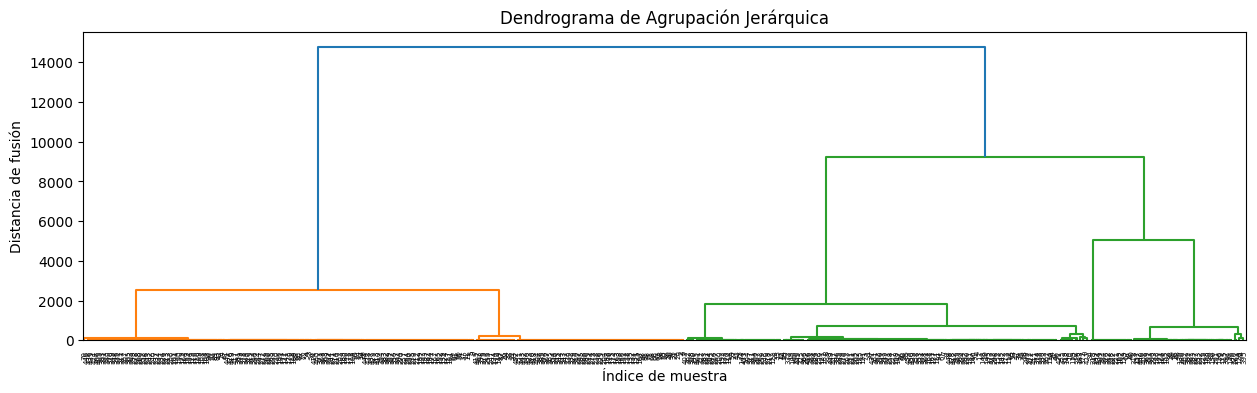

In [18]:
# Calcular la matriz de enlaces
X = df_train.values
Z = linkage(X, method='ward')

# Graficar el dendrograma
plt.figure(figsize=(15, 4))
dendrogram(Z)
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia de fusión')
plt.title('Dendrograma de Agrupación Jerárquica')
plt.show()

Forma 2) Metodo del codo: calculamos la inercia para cada K y graficamos el resultado para buscar el codo

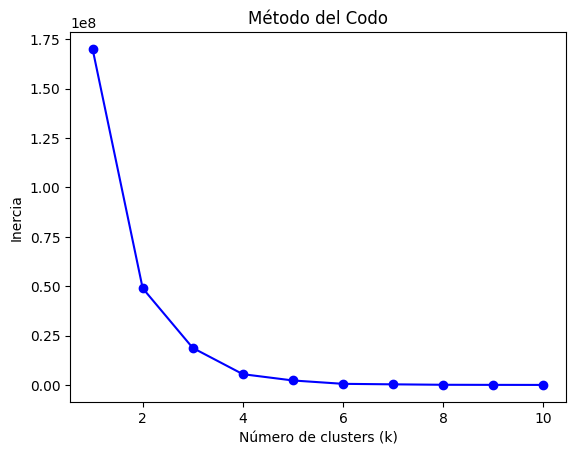

In [19]:
# Lista para almacenar los valores de inercia (suma de distancias cuadradas)
inercias = []

# Rango de valores de k para probar
k_values = range(1, 11)  

# Iterar sobre los valores de k y calcular la inercia para cada k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10).fit(df_train)
    inercias.append(kmeans.inertia_)

# Graficar la curva de inercias en función de k
plt.plot(k_values, inercias, 'bo-')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

En el grafico podemos ver que un numero optimo de K es 2 o 3

In [27]:
df_train.head()

eventId  processName_categ  parentProcessId
540         3                6.0              838
171         5                1.0             1047
1158      257                7.0                1
1216        3                7.0                1
116         3                6.0             1047

Vamos a entrenar un algortimo de kmeans con k=2 y k=3

Puntuación del coeficiente de silueta: 0.835269930848137


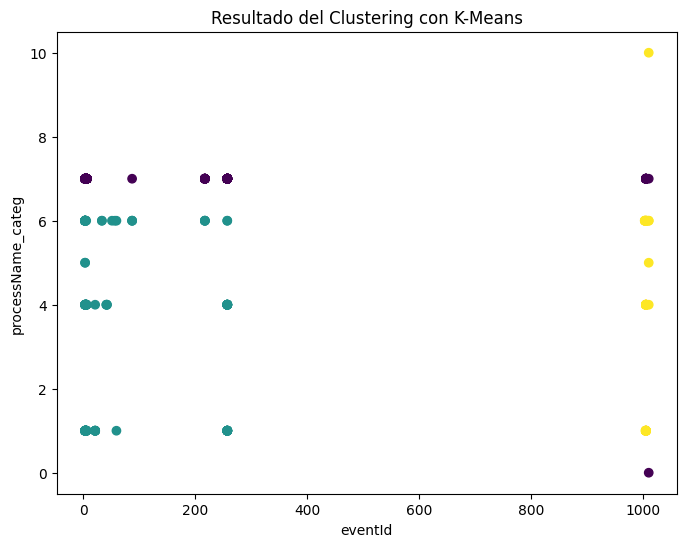

In [31]:
df_kmeans = df_train.copy()
k = 3  # Número de clusters

kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)

# Entrenar el modelo de KMeans
kmeans.fit(df_kmeans)

# Obtener las etiquetas de cluster asignadas a cada muestra
labels = kmeans.labels_

# Calcular la puntuación del coeficiente de silueta
silhouette_avg = silhouette_score(X, labels)

# Imprimir la puntuación del coeficiente de silueta
print(f'Puntuación del coeficiente de silueta: {silhouette_avg}')

# Agregar las etiquetas de cluster como una columna al DataFrame original
df_kmeans['cluster'] = labels

# Graficar los resultados en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df_kmeans[var1], df_kmeans[var2], c=labels, cmap='viridis')
ax.set_title('Resultado del Clustering con K-Means')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
# plt.colorbar(scatter)
plt.show()

In [32]:
# Graficar el resultado en 3D
fig = px.scatter_3d(df_kmeans, x=var1, y=var2, z=var3, color='cluster',
                    color_continuous_scale='Viridis', opacity=0.8, size_max=5)
fig.update_layout(scene=dict(xaxis_title=var1, yaxis_title=var2, zaxis_title=var3))
fig.show()

In [33]:
df_kmeans.head()

eventId  processName_categ  parentProcessId  cluster
540         3                6.0              838        1
171         5                1.0             1047        1
1158      257                7.0                1        0
1216        3                7.0                1        0
116         3                6.0             1047        1

Como parte del procesamiento de los datos, habiamos normalizados los datos. Ahora necesitamos invertir la operacion para que los valores de los atributos tengan sentido.


In [34]:
# Desnormalizamos los datos
columnas_desnormalizar = [var1, var2, var3]
df_kmeans[columnas_desnormalizar] = scaler.inverse_transform(df_kmeans[columnas_desnormalizar])
df_kmeans.head()

eventId  processName_categ  parentProcessId  cluster
540    1201.879518          19.469013    431317.203978        1
171    1865.940165           7.668477    538774.375334        1
1158  85537.581756          21.829121       974.369410        0
1216   1201.879518          21.829121       974.369410        0
116    1201.879518          19.469013    538774.375334        1

Podemos ver que el evento anomalo es el que se encuentra en el cluster=1

In [35]:
df_kmeans[df_kmeans['cluster']==1].head()

eventId  processName_categ  parentProcessId  cluster
540  1201.879518          19.469013    431317.203978        1
171  1865.940165           7.668477    538774.375334        1
116  1201.879518          19.469013    538774.375334        1
214  1201.879518           7.668477    538774.375334        1
61   1201.879518          17.108906    553170.551401        1

Predecimos el cluster de los registros en el conjunto de testeo

In [36]:
# Realizamos las predicciones

df_kmeans_test = df_test.copy()
predicciones = kmeans.predict(df_kmeans_test)
df_kmeans_test['prediction'] = predicciones
df_kmeans_test

eventId  processName_categ  parentProcessId  prediction
301         3                4.0             1047           1
162      1005                1.0             1047           2
187       257                1.0             1047           1
291         3                4.0             1047           1
1446      217                7.0                1           0
...       ...                ...              ...         ...
231         3                1.0             1047           1
539         3                6.0              940           1
98          3                6.0             1047           1
1460        3                7.0                1           0
537         3                6.0              719           1

[114 rows x 4 columns]

### Isolation Forest

Entrenamos el modelo con el mismo dataset que usamos en kmeans ya que para este modelo, tambien se requiere que las variables sean numericas

In [37]:
modelo = IsolationForest(n_estimators=100, contamination=0.05)

df_isolation = df_train.copy()
# Ajustar el modelo a los datos
modelo.fit(df_isolation)

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.05)

In [38]:
# Predecir las anomalías en los datos
predicciones = modelo.predict(df_isolation)

# Las predicciones son -1 para anomalías y 1 para datos normales
cantidad_anomalias = (predicciones == -1).sum()
print('Cantidad de anomalias: ', cantidad_anomalias)

# También podemos obtener la puntuación de anomalía para cada punto de datos
puntuaciones_anomalia = modelo.decision_function(df_isolation)
df_isolation['puntuaciones_anomalia'] = puntuaciones_anomalia
df_isolation['cluster'] = predicciones

df_isolation.head()

Cantidad de anomalias:  23


eventId  processName_categ  parentProcessId  puntuaciones_anomalia  \
540         3                6.0              838              -0.021083   
171         5                1.0             1047               0.119402   
1158      257                7.0                1               0.135372   
1216        3                7.0                1               0.124833   
116         3                6.0             1047               0.136360   

      cluster  
540        -1  
171         1  
1158        1  
1216        1  
116         1

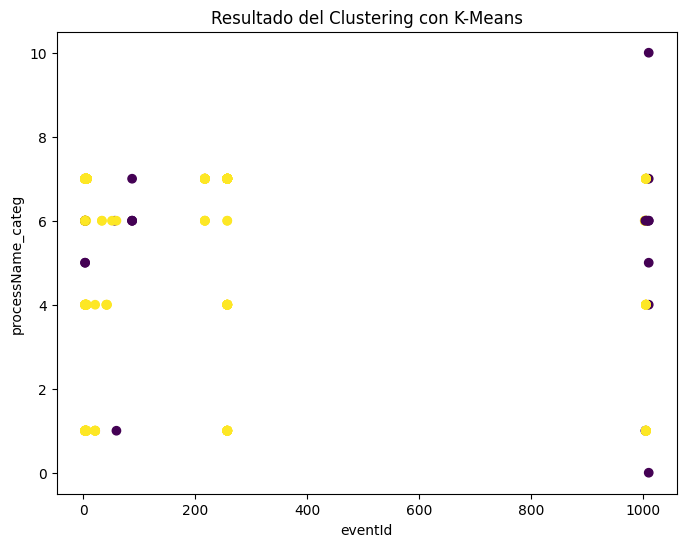

In [42]:
# Graficamos los resultados en 2D
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(df_isolation[var1], df_isolation[var2], c=df_isolation['cluster'], cmap='viridis')
ax.set_title('Resultado del Clustering con K-Means')
ax.set_xlabel(var1)
ax.set_ylabel(var2)
# plt.colorbar(scatter)
plt.show()

In [43]:
# Graficamos el resultado en 3D
fig = px.scatter_3d(df_isolation, x=var1, y=var2, z=var3, color='cluster',
                    color_continuous_scale='Viridis', opacity=0.8, size_max=5)
fig.update_layout(scene=dict(xaxis_title=var1, yaxis_title=var2, zaxis_title=var3))
fig.show()

Vamos ahora a predecir la clase con el conjunto de testeo

In [44]:
df_isolation_test = df_test.copy()
# Aplicar el modelo entrenado para predecir anomalías en los nuevos datos
predicciones_nuevos_datos = modelo.predict(df_isolation_test)
df_isolation_test['predicciones'] = predicciones_nuevos_datos
df_isolation_test

eventId  processName_categ  parentProcessId  predicciones
301         3                4.0             1047             1
162      1005                1.0             1047             1
187       257                1.0             1047             1
291         3                4.0             1047             1
1446      217                7.0                1             1
...       ...                ...              ...           ...
231         3                1.0             1047             1
539         3                6.0              940             1
98          3                6.0             1047             1
1460        3                7.0                1             1
537         3                6.0              719            -1

[114 rows x 4 columns]

Podemos ver que los registros cuyas clases son -1, son los eventos considerados anomalos

In [45]:
df_isolation_test[df_isolation_test['predicciones']==-1]

eventId  processName_categ  parentProcessId  predicciones
635     1010                6.0              838            -1
547        3                6.0              719            -1
537        3                6.0              719            -1

Por lo tanto, para el usuario en cuestion, los eventos anomalos serian cuando el eventId es 3, el processName_categ = 6 y el parentProcessId = 719 y tambien cuando el eventId es 1010, el processName_categ = 6 y el parentProcessId = 838

### Con estadistica 

Vamos a tomar un ultimo approach al problema, esta vez con estadistica.

Consideremos el siguiente ejemplo de una anomalia: *Si el usuario de id 1000 solo genera eventos con proceso de tipo “ps” y de repente genera eventos con procesos “bash” debería ser considerado como anómalo. En cambio si el usuario 100 solo genera eventos con procesos bash no debe ser considerado como anómalo.*

Entonces, podemos ver la frecuencia de los procesos generados por cada usuario y etiquetar como anomalos los que tengan frecuencia muy baja. Para eso, graficamos un histograma para eventos y otro para procesosa

In [46]:
# Creamos un histograma de eventId

df_kmeans101[var1].unique()

fig = px.histogram(df_kmeans101, x=var1, nbins=len(df_kmeans101))
fig.show()

Vemos que hay algunos eventos que tienen alta frecuencia como el eventId=5 o eventId=257. Sin embargo, hay otro como eventId=51 o eventId=57 que tiene muy baja frecuencia por lo que seria considerado anomalo. 

In [47]:
# Creamos un histograma de processId

print(df_kmeans101[var2].unique())
fig = px.histogram(df_kmeans101, x=var3, nbins=len(df_kmeans101))
fig.show()

[ 5.  6. 10.  1.  4.  7.  0.]


Vemos que hay un solo procesId por lo que no vemos nada anomalo

# Fase VI. Deployment. Despliegue (puesta en producción)

Ponemos el modelo en producción para que siga detectando anomalías en el usuario.
Propuesta:  con GCP, alojamos los datos en BigQuery, el modelo en Cloud Functions y el análisis de los resultados en Data Studio, tal como se observa en la ilustración: 


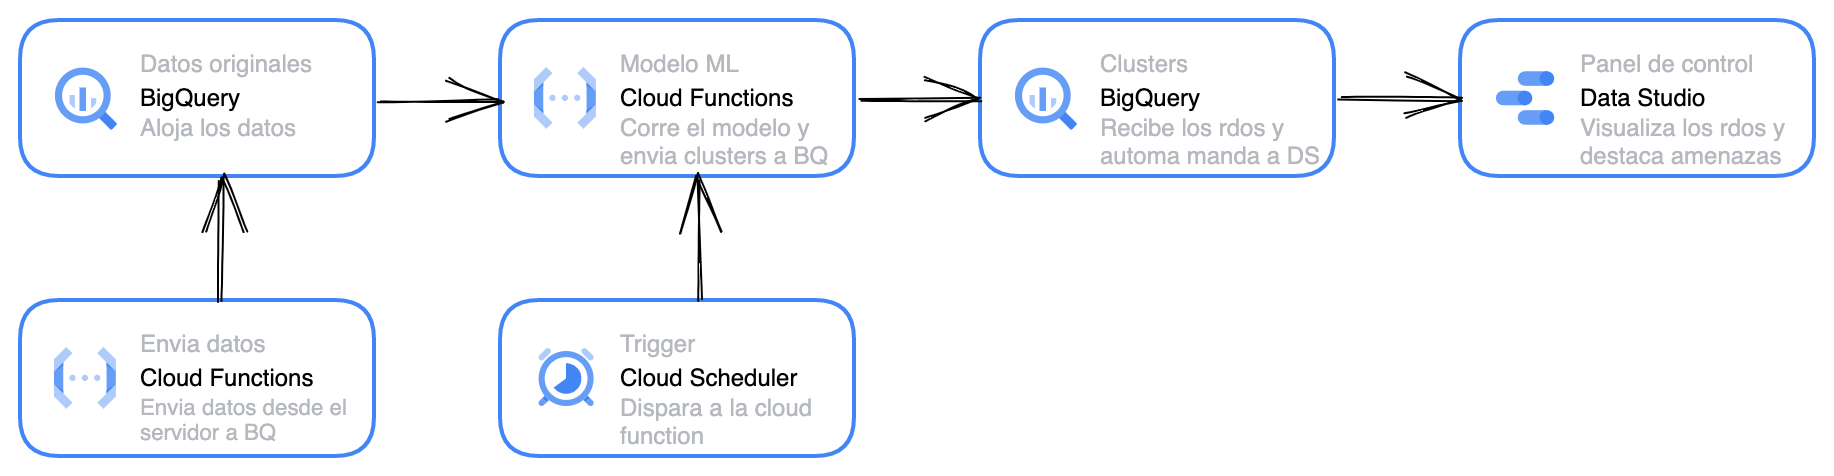

Como las herramientas propuestas son pagas, no pude poner el modelo en produccion en GCP. 

# Propuestas a futuro




*   Entrenar un modelo supervisado en lugar de un no supervisado --> Al modelo no supervisado, no se le pueden calcular las métricas de evaluación como accuracy, precisión, matriz de confusión, curva ROC, etc. Por lo tanto, generalmente se lo evalúa de manera visual y como máximo, podemos entrenarlo en R2 o R3 para poder graficarlo.
* Si no tenemos un dataset con etiquetas, podemos construirlo. 
* En caso de entrenarlo con algoritmo supervisado, podemos calcular las métricas de evaluación y poner alertas cuando empiezan a disminuir para poder re-entrenar el modelo. Siempre vamos a saber el porcentaje de anomalías que estamos detectando y podemos mejorar la metrica
